Here we are given a data set diamonds.csv in which we have to predict the diamond price.

In [727]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import math
import random
import os

To deal with shuffling.

In [728]:
def seed():
  np.random.seed(42)
  random.seed(42)
  os.environ["PYTHONHASHSEED"] = "42"

seed()


In [729]:
ds = pd.read_csv('/content/diamonds.csv')

In [730]:
ds.loc[:20,:]


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [731]:
ds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Null Values
Checking for the null values

In [732]:
ds.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

##Checking unique Values

In [733]:
ds.nunique()

Unnamed: 0    53940
carat           273
cut               5
color             7
clarity           8
depth           184
table           127
price         11602
x               554
y               552
z               375
dtype: int64

We can drop the Unnamed Column as it is just indexing

In [734]:
ds.drop(axis="columns", labels="Unnamed: 0", inplace=True) 
ds.loc[:10,:]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


We see x(length), y(width) and z(depth) has minimum value 0 which indicates these are wrong values so we can remove those rows

In [735]:
ds = ds.drop(ds[ds["x"]==0].index)
ds = ds.drop(ds[ds["y"]==0].index)
ds = ds.drop(ds[ds["z"]==0].index)

In [736]:
ds.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [737]:
ds.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11597
x            553
y            550
z            374
dtype: int64

Now we see cut, color and clarity has 5, 7 and 8 unique values.
Lets check these.

In [738]:
ds["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [739]:
ds["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [740]:
ds["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

#Label Encoding
We can do label encoding on these columns.
We have to take care of some cases like:

Color:
J= Worst(1)
D= Best(7)

Clarity:
(I1 (1), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (8))

Cut:
(Fair(1), Good, Very Good, Premium, Ideal(5))

In [741]:
ds["color"] = ds["color"].map({"J": 1,"I": 2,"H": 3,"G": 4,"F": 5,"E": 6,"D": 7})
ds["clarity"] = ds["clarity"].map({"I1": 1,"SI2": 2,"SI1": 3,"VS2": 4,"VS1": 5,"VVS2": 6,"VVS1": 7, "IF" : 8})
ds["cut"] = ds["cut"].map({"Fair": 1,"Good": 2,"Very Good": 3,"Premium": 4,"Ideal": 5})

In [742]:
ds.loc[:10,:]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,3,1,6,62.8,57.0,336,3.94,3.96,2.48
6,0.24,3,2,7,62.3,57.0,336,3.95,3.98,2.47
7,0.26,3,3,3,61.9,55.0,337,4.07,4.11,2.53
8,0.22,1,6,4,65.1,61.0,337,3.87,3.78,2.49
9,0.23,3,3,5,59.4,61.0,338,4.00,4.05,2.39


#Duplicate Rows
We are removing the duplicate rows if present.



In [743]:
ds.duplicated().sum()

145

In [744]:
ds.drop(axis="rows", labels=ds.index[ds.duplicated()], inplace=True)
ds.duplicated().sum()

0

#Feature Scaling
We are now doing the feature scaling for columns x, y, z, table and depth using min-max normalization

In [745]:
x = ds["x"] - np.min(ds["x"])
y = np.max(ds["x"]) - np.min(ds["x"])
ds["x"] = x/y
ds.loc[:20,:]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,0.031384,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,0.022825,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,0.045649,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,0.067047,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,0.087019,4.35,2.75
5,0.24,3,1,6,62.8,57.0,336,0.029957,3.96,2.48
6,0.24,3,2,7,62.3,57.0,336,0.031384,3.98,2.47
7,0.26,3,3,3,61.9,55.0,337,0.048502,4.11,2.53
8,0.22,1,6,4,65.1,61.0,337,0.019971,3.78,2.49
9,0.23,3,3,5,59.4,61.0,338,0.038516,4.05,2.39


In [746]:
x = ds["price"] - np.min(ds["price"])
y = np.max(ds["price"]) - np.min(ds["price"])
ds["price"] = x/y
ds.loc[:20,:]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,0.000000,0.031384,3.98,2.43
1,0.21,4,6,3,59.8,61.0,0.000000,0.022825,3.84,2.31
2,0.23,2,6,5,56.9,65.0,0.000054,0.045649,4.07,2.31
3,0.29,4,2,4,62.4,58.0,0.000433,0.067047,4.23,2.63
4,0.31,2,1,2,63.3,58.0,0.000487,0.087019,4.35,2.75
5,0.24,3,1,6,62.8,57.0,0.000541,0.029957,3.96,2.48
6,0.24,3,2,7,62.3,57.0,0.000541,0.031384,3.98,2.47
7,0.26,3,3,3,61.9,55.0,0.000595,0.048502,4.11,2.53
8,0.22,1,6,4,65.1,61.0,0.000595,0.019971,3.78,2.49
9,0.23,3,3,5,59.4,61.0,0.000649,0.038516,4.05,2.39


In [747]:
x = ds["y"] - np.min(ds["y"])
y = np.max(ds["y"]) - np.min(ds["y"])
ds["y"] = x/y
ds.loc[:10,:]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,0.000000,0.031384,0.005433,2.43
1,0.21,4,6,3,59.8,61.0,0.000000,0.022825,0.002898,2.31
2,0.23,2,6,5,56.9,65.0,0.000054,0.045649,0.007063,2.31
3,0.29,4,2,4,62.4,58.0,0.000433,0.067047,0.009960,2.63
4,0.31,2,1,2,63.3,58.0,0.000487,0.087019,0.012133,2.75
5,0.24,3,1,6,62.8,57.0,0.000541,0.029957,0.005071,2.48
6,0.24,3,2,7,62.3,57.0,0.000541,0.031384,0.005433,2.47
7,0.26,3,3,3,61.9,55.0,0.000595,0.048502,0.007787,2.53
8,0.22,1,6,4,65.1,61.0,0.000595,0.019971,0.001811,2.49
9,0.23,3,3,5,59.4,61.0,0.000649,0.038516,0.006700,2.39


In [748]:
x = ds["z"] - np.min(ds["z"])
y = np.max(ds["z"]) - np.min(ds["z"])
ds["z"] = x/y
ds.loc[:5,:]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,0.000000,0.031384,0.005433,0.044256
1,0.21,4,6,3,59.8,61.0,0.000000,0.022825,0.002898,0.040351
2,0.23,2,6,5,56.9,65.0,0.000054,0.045649,0.007063,0.040351
3,0.29,4,2,4,62.4,58.0,0.000433,0.067047,0.009960,0.050765
4,0.31,2,1,2,63.3,58.0,0.000487,0.087019,0.012133,0.054670
5,0.24,3,1,6,62.8,57.0,0.000541,0.029957,0.005071,0.045884


In [749]:
x = ds["depth"] - np.min(ds["depth"])
y = np.max(ds["depth"]) - np.min(ds["depth"])
ds["depth"] = x/y
ds.loc[:10,:]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,0.513889,55.0,0.000000,0.031384,0.005433,0.044256
1,0.21,4,6,3,0.466667,61.0,0.000000,0.022825,0.002898,0.040351
2,0.23,2,6,5,0.386111,65.0,0.000054,0.045649,0.007063,0.040351
3,0.29,4,2,4,0.538889,58.0,0.000433,0.067047,0.009960,0.050765
4,0.31,2,1,2,0.563889,58.0,0.000487,0.087019,0.012133,0.054670
5,0.24,3,1,6,0.550000,57.0,0.000541,0.029957,0.005071,0.045884
6,0.24,3,2,7,0.536111,57.0,0.000541,0.031384,0.005433,0.045558
7,0.26,3,3,3,0.525000,55.0,0.000595,0.048502,0.007787,0.047511
8,0.22,1,6,4,0.613889,61.0,0.000595,0.019971,0.001811,0.046209
9,0.23,3,3,5,0.455556,61.0,0.000649,0.038516,0.006700,0.042955


In [750]:
x = ds["table"] - np.min(ds["table"])
y = np.max(ds["table"]) - np.min(ds["table"])
ds["table"] = x/y
ds.loc[:10,:]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,0.513889,0.230769,0.000000,0.031384,0.005433,0.044256
1,0.21,4,6,3,0.466667,0.346154,0.000000,0.022825,0.002898,0.040351
2,0.23,2,6,5,0.386111,0.423077,0.000054,0.045649,0.007063,0.040351
3,0.29,4,2,4,0.538889,0.288462,0.000433,0.067047,0.009960,0.050765
4,0.31,2,1,2,0.563889,0.288462,0.000487,0.087019,0.012133,0.054670
5,0.24,3,1,6,0.550000,0.269231,0.000541,0.029957,0.005071,0.045884
6,0.24,3,2,7,0.536111,0.269231,0.000541,0.031384,0.005433,0.045558
7,0.26,3,3,3,0.525000,0.230769,0.000595,0.048502,0.007787,0.047511
8,0.22,1,6,4,0.613889,0.346154,0.000595,0.019971,0.001811,0.046209
9,0.23,3,3,5,0.455556,0.346154,0.000649,0.038516,0.006700,0.042955


In [751]:
ds.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000
mean,0.797536,3.904231,4.406267,4.052366,0.520784,0.278035,0.194908,0.285532,0.037213,0.080376
std,0.473169,1.116097,1.701271,1.646733,0.039712,0.042947,0.215490,0.159574,0.020635,0.022845
min,0.200000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,3.000000,3.000000,3.000000,0.500000,0.250000,0.033789,0.139800,0.018834,0.059876
50%,0.700000,4.000000,4.000000,4.000000,0.522222,0.269231,0.112180,0.281027,0.036762,0.080052
75%,1.040000,5.000000,6.000000,5.000000,0.541667,0.307692,0.270206,0.400856,0.051793,0.096323
max,5.010000,5.000000,7.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Correlation

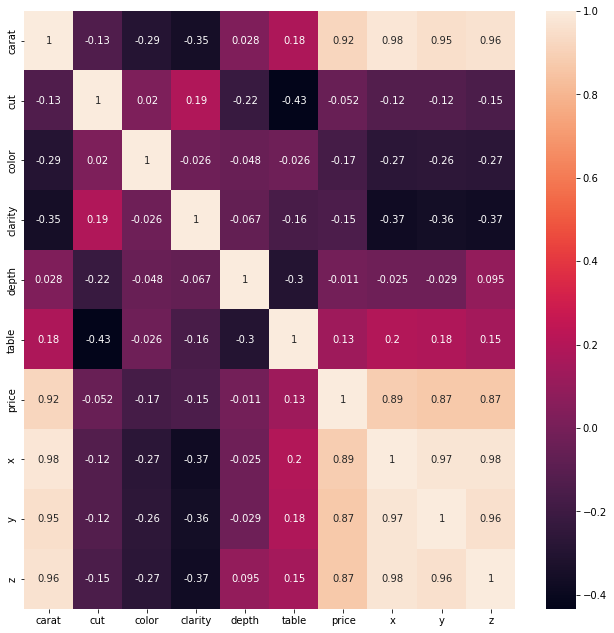

In [752]:
plt.figure(figsize=(11,11))
sns.heatmap(ds.corr(), annot=True)

"x", "y" and "z" show a high correlation to the "price" column.
So we can drop any two columns.
We also see "carat" is very much dependent on "x", "y" and "z" as it is obvious if length, width and depth increases carat will increase.
So let's drop carat as it has the highest correlation.

"depth", "cut" and "table" show low correlation.

In [753]:
ds.drop(axis="columns", labels="carat", inplace=True)


In [754]:
ds.loc[:10,:]

,cut,color,clarity,depth,table,price,x,y,z
0,5,6,2,0.513889,0.230769,0.000000,0.031384,0.005433,0.044256
1,4,6,3,0.466667,0.346154,0.000000,0.022825,0.002898,0.040351
2,2,6,5,0.386111,0.423077,0.000054,0.045649,0.007063,0.040351
3,4,2,4,0.538889,0.288462,0.000433,0.067047,0.009960,0.050765
4,2,1,2,0.563889,0.288462,0.000487,0.087019,0.012133,0.054670
5,3,1,6,0.550000,0.269231,0.000541,0.029957,0.005071,0.045884
6,3,2,7,0.536111,0.269231,0.000541,0.031384,0.005433,0.045558
7,3,3,3,0.525000,0.230769,0.000595,0.048502,0.007787,0.047511
8,1,6,4,0.613889,0.346154,0.000595,0.019971,0.001811,0.046209
9,3,3,5,0.455556,0.346154,0.000649,0.038516,0.006700,0.042955


##Test and Training Data

In [755]:
train = ds.sample(frac = 0.75, replace = False)        
test = ds.drop(train.index)

In [756]:
train = train.to_numpy()
test = test.to_numpy()

In [757]:
label_col = 5
# label_col is  price column
y_train = train[:,label_col]
x_train = np.delete(train,label_col,1)
#inserting bias b, this will work for both univariate and multivariate
x_train = np.insert(x_train, 0, np.ones(len(x_train)), axis=1) 

y_test = test[:,label_col]
x_test = np.delete(test,label_col,1)
#inserting bias b 
x_test = np.insert(x_test, 0, np.ones(len(y_test)), axis=1)

In [758]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(40331, 9)
(13444, 9)
(40331,)
(13444,)


#Linear Regression

###Closed Form

w = (X.T*X)^-1 * X.T*Y

In [759]:
def closedForm(x, y):              
  return np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), y) 

###Gradient Descent
In X, we are adding a column of all 1's which represents our bias (b) from the equation y = w*x + b.

y_cap = y_pred = x * w
cost = J(w) =  -1/m * sigma( (y - y_cap)^2 ) for i =1 to m

dJ(w) / dw = -1/m * X * (y - y_cap) ; m = rows

a = alpha (learning rate)

w = w - a * dJ/dw


In [760]:
def gradientDescent(x, y, w, itr, alpha):
  costs_list = [1]*itr
  for i in range(itr):
    y_cap = np.dot(x, w)
    loss = y_cap - y
    cost = np.sum(loss ** 2) / len(x)
    
    #each iterations cost 
    costs_list[i] = cost
    if (i % 50 == 0):
      print("Cost=",cost)
    #w = w - aplha * d(loss)/dw
    grad = np.dot(x.T, loss) / len(x)
    w = w - alpha * grad
  return w, costs_list

###Mean Squared Error

The Mean Squared Error measures how close a regression line is to a set of data points.

In [761]:
def meanSqErr(y_pred, y_test):
  MeanSquaredError = np.mean(np.square(y_pred - y_test))
  return MeanSquaredError

### For Graph Plot

In [762]:
def plotCost(cost, method):
  plt.plot(cost)
  plt.ylabel('Cost')
  plt.xlabel('iteration')
  plt.title('Cost curve (' + method + ' solution)')
  plt.show()

###UniVariate

Lets check the correlation Matrix and check which columns are most dependent on our label column

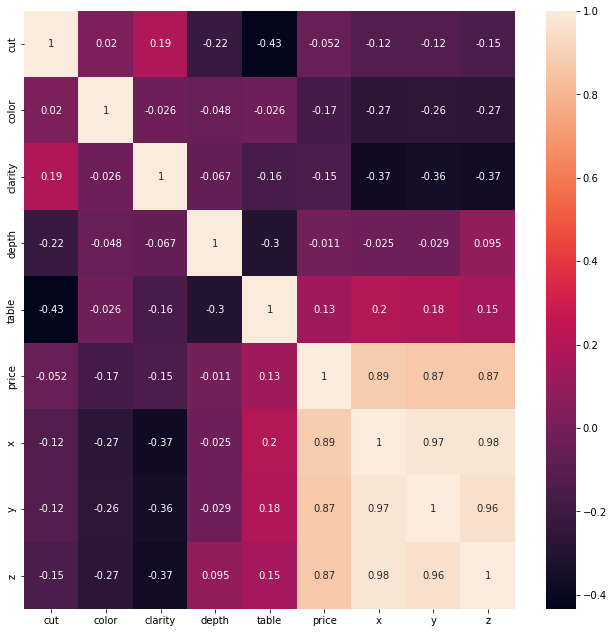

In [763]:
plt.figure(figsize=(11,11))
sns.heatmap(ds.corr(), annot=True)

In [764]:
x_train

array([[1.        , 5.        , 7.        , ..., 0.06419401, 0.00851141,
        0.04913765],
       [1.        , 3.        , 7.        , ..., 0.2810271 , 0.03730532,
        0.07972665],
       [1.        , 4.        , 3.        , ..., 0.53780314, 0.06700471,
        0.11096648],
       ...,
       [1.        , 5.        , 4.        , ..., 0.22253923, 0.02951829,
        0.07159128],
       [1.        , 4.        , 5.        , ..., 0.41940086, 0.05378486,
        0.10055321],
       [1.        , 2.        , 1.        , ..., 0.50071327, 0.06519377,
        0.11519688]])

In [765]:
#here we are taking two columns from our x_train and x_test 
# 1st column = bias (b) and i'th column = feature on which we will apply Univariate.
def train_test_univariate(i):
  #                       bias          i'th column
  ux_train = np.array([x_train[:,0], x_train[:,i]]).T
  ux_test = np.array([x_test[:,0], x_test[:,i]]).T
  return ux_train, ux_test, y_train, y_test

We can take any of the columns : x, y, z for prediction of label

In [766]:
x_col = ds.columns.get_loc("x")
y_col = ds.columns.get_loc("y")
z_col = ds.columns.get_loc("z")

####For X Column

In [767]:
ux_train, ux_test, uy_train, uy_test = train_test_univariate(x_col)
uy_train=uy_train.reshape((len(uy_train), 1))
uy_test=uy_test.reshape((len(uy_test), 1))

In [768]:
#Closed Form Solutin 

weightC_UNI = closedForm(ux_train, uy_train)
y_pred_closed_UNI = np.dot(ux_test, weightC_UNI)
print("Closed form UniVariate using << X >> column Mean Squared Error = ", meanSqErr(y_pred_closed_UNI, uy_test))

Closed form UniVariate using << X >> column Mean Squared Error =  0.010007017074549722


In [769]:
#Gradient Descent Solution 
weightG_UNI = 0.1
itr = 600
alpha = 0.35
weightG_UNI, costsG_UNI = gradientDescent(ux_train, uy_train, weightG_UNI, itr, alpha)

Cost= 0.1230726656888536
Cost= 0.04556362687616016
Cost= 0.03102156416809773
Cost= 0.024656724709065096
Cost= 0.02187093137612901
Cost= 0.020651632045205953
Cost= 0.02011796329066754
Cost= 0.019884384601376395
Cost= 0.019782150765074398
Cost= 0.019737404571332398
Cost= 0.019717819843547355
Cost= 0.019709247906353627


In [770]:
y_pred_grad_UNI = np.dot(ux_test, weightG_UNI)
print("Gradient Descent UniVariate using <X> column Mean Squared Error = ", meanSqErr(y_pred_grad_UNI, uy_test))

Gradient Descent UniVariate using <X> column Mean Squared Error =  0.010011437186306944


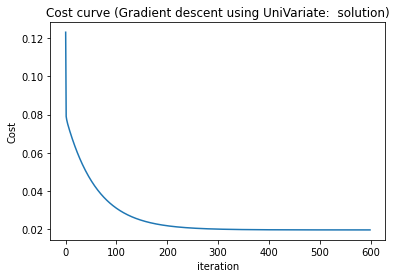

In [771]:
plotCost(costsG_UNI, "Gradient descent using UniVariate: ")

####For Y Column

In [772]:
ux_train, ux_test, uy_train, uy_test = train_test_univariate(y_col)
uy_train=uy_train.reshape((len(uy_train), 1))
uy_test=uy_test.reshape((len(uy_test), 1))

In [773]:
#Closed Form Solutin 

weightC_UNI = closedForm(ux_train, uy_train)
y_pred_closed_UNI = np.dot(ux_test, weightC_UNI)
print("Closed form UniVariate using << Y >> column Mean Squared Error = ", meanSqErr(y_pred_closed_UNI, uy_test))

Closed form UniVariate using << Y >> column Mean Squared Error =  0.017043747722067813


In [774]:
#Gradient Descent Solution 
weightG_UNI = 0.1
itr = 1000
alpha = 0.011
weightG_UNI, costsG_UNI = gradientDescent(ux_train, uy_train, weightG_UNI, itr, alpha)

Cost= 0.13697936620553774
Cost= 0.09631344469359934
Cost= 0.09269088319243472
Cost= 0.09147294628003394
Cost= 0.09104936538727677
Cost= 0.09088820245596667
Cost= 0.09081373642459524
Cost= 0.09076791938236774
Cost= 0.0907315757084925
Cost= 0.09069837090116778
Cost= 0.09066621240927056
Cost= 0.09063440897276392
Cost= 0.090602732235794
Cost= 0.0905711067588329
Cost= 0.09053950761691729
Cost= 0.09050792657212775
Cost= 0.09047636089896492
Cost= 0.09044480969291056
Cost= 0.09041327265099361
Cost= 0.09038174966896048


In [775]:
y_pred_grad_UNI = np.dot(ux_test, weightG_UNI)
print("Gradient Descent UniVariate using << Y >> column Mean Squared Error = ", meanSqErr(y_pred_grad_UNI, uy_test))

Gradient Descent UniVariate using << Y >> column Mean Squared Error =  0.04577479011263783


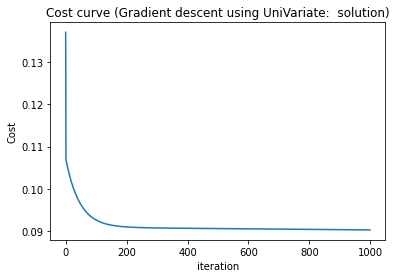

In [776]:
plotCost(costsG_UNI, "Gradient descent using UniVariate: ")

#### Z Column

In [777]:
#Gradient Descent Solution 
weightG_UNI = 0.1
itr = 1000
alpha = 0.011
weightG_UNI, costsG_UNI = gradientDescent(ux_train, uy_train, weightG_UNI, itr, alpha)

Cost= 0.13697936620553774
Cost= 0.09631344469359934
Cost= 0.09269088319243472
Cost= 0.09147294628003394
Cost= 0.09104936538727677
Cost= 0.09088820245596667
Cost= 0.09081373642459524
Cost= 0.09076791938236774
Cost= 0.0907315757084925
Cost= 0.09069837090116778
Cost= 0.09066621240927056
Cost= 0.09063440897276392
Cost= 0.090602732235794
Cost= 0.0905711067588329
Cost= 0.09053950761691729
Cost= 0.09050792657212775
Cost= 0.09047636089896492
Cost= 0.09044480969291056
Cost= 0.09041327265099361
Cost= 0.09038174966896048


In [778]:
ux_train, ux_test, uy_train, uy_test = train_test_univariate(z_col)
uy_train=uy_train.reshape((len(uy_train), 1))
uy_test=uy_test.reshape((len(uy_test), 1))

In [779]:
#Closed Form Solutin 

weightC_UNI = closedForm(ux_train, uy_train)
y_pred_closed_UNI = np.dot(ux_test, weightC_UNI)
print("Closed form UniVariate using << Z >> column Mean Squared Error = ", meanSqErr(y_pred_closed_UNI, uy_test))

Closed form UniVariate using << Z >> column Mean Squared Error =  0.014940489937509394


In [780]:
#Gradient Descent Solution 
weightG_UNI = 0.1
itr = 1000
alpha = 0.012
weightG_UNI, costsG_UNI = gradientDescent(ux_train, uy_train, weightG_UNI, itr, alpha)

Cost= 0.1352712007544064
Cost= 0.09508750523039379
Cost= 0.09196686550196595
Cost= 0.09101135470391955
Cost= 0.09069821895911043
Cost= 0.09057568290888587
Cost= 0.09050971242647102
Cost= 0.09046054184024391
Cost= 0.09041637333653367
Cost= 0.09037370669260293
Cost= 0.09033150344076013
Cost= 0.09028945547445004
Cost= 0.09024747137293321
Cost= 0.09020552400249734
Cost= 0.09016360530231136
Cost= 0.09012171287015225
Cost= 0.0900798459826169
Cost= 0.09003800441438607
Cost= 0.0899961880879201
Cost= 0.0899543969695295


In [781]:
y_pred_grad_UNI = np.dot(ux_test, weightG_UNI)
print("Gradient Descent UniVariate using << Z >> column Mean Squared Error = ", meanSqErr(y_pred_grad_UNI, uy_test))

Gradient Descent UniVariate using << Z >> column Mean Squared Error =  0.04555797801968022


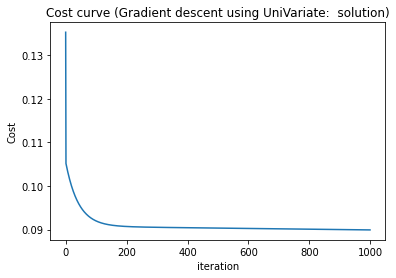

In [782]:
plotCost(costsG_UNI, "Gradient descent using UniVariate: ")

###MultiVariate

In [783]:
#Closed Form Solution

weightC = closedForm(x_train, y_train)

#Gradient Descent Solution 

weightG = [0.1] * len(x_train[0])
itr = 220
alpha = 0.001
weightG, costsG = gradientDescent(x_train, y_train,weightG, itr, alpha)

Cost= 1.7276138171175495
Cost= 0.04461621990072215
Cost= 0.038621204751832144
Cost= 0.038480786396332324
Cost= 0.03836601866517273


In [784]:
#closed form prediction
y_pred_closed = np.dot(x_test, weightC)

#gradient descent prediction
y_pred_grad = np.dot(x_test, weightG)


In [785]:
print("Closed form Mean Squared Error = ", meanSqErr(y_pred_closed, y_test))

Closed form Mean Squared Error =  0.011663738954442171


In [786]:
print("Gradient descent Mean Squared Error = ", meanSqErr(y_pred_grad, y_test))

Gradient descent Mean Squared Error =  0.03892606575592581


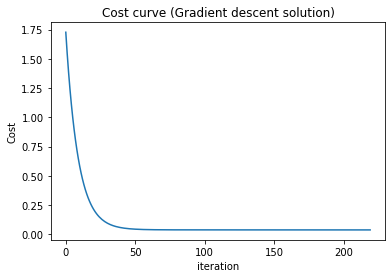

In [787]:
plotCost(costsG, "Gradient descent")

### Further checking for correlated columns and checking for results

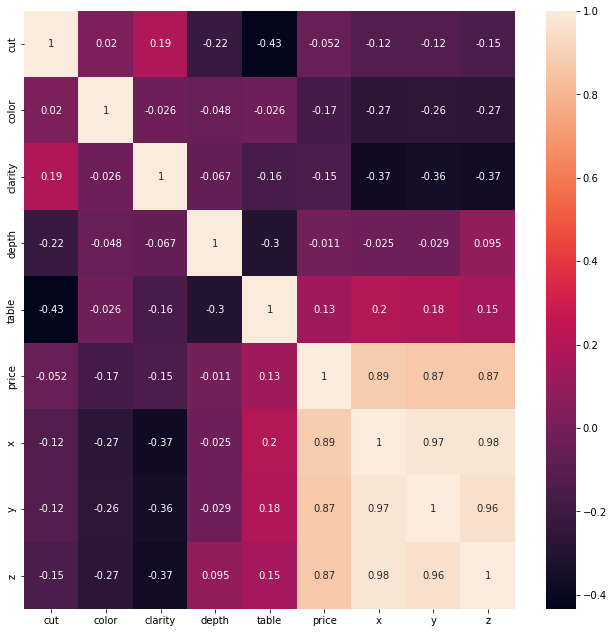

In [788]:
plt.figure(figsize=(11,11))
sns.heatmap(ds.corr(), annot=True)

Let's also try with dropping x, y and z values as they are highly correlated to our target column

In [789]:
x_col = ds.columns.get_loc("x")
y_col = ds.columns.get_loc("y")
z_col = ds.columns.get_loc("z")

In [790]:
ds.head()

,cut,color,clarity,depth,table,price,x,y,z
0,5,6,2,0.513889,0.230769,0.000000,0.031384,0.005433,0.044256
1,4,6,3,0.466667,0.346154,0.000000,0.022825,0.002898,0.040351
2,2,6,5,0.386111,0.423077,0.000054,0.045649,0.007063,0.040351
3,4,2,4,0.538889,0.288462,0.000433,0.067047,0.009960,0.050765
4,2,1,2,0.563889,0.288462,0.000487,0.087019,0.012133,0.054670


In [791]:
ds.drop(axis="columns", labels="y", inplace=True)
ds.drop(axis="columns", labels="x", inplace=True)
ds.drop(axis="columns", labels="z", inplace=True)

Again calculating x_train, x_test, y_train and y_test after dropping columns and checking for multivariate values

In [792]:
ds.head()

,cut,color,clarity,depth,table,price
0,5,6,2,0.513889,0.230769,0.000000
1,4,6,3,0.466667,0.346154,0.000000
2,2,6,5,0.386111,0.423077,0.000054
3,4,2,4,0.538889,0.288462,0.000433
4,2,1,2,0.563889,0.288462,0.000487


Removing from test and train sets

In [793]:
label_col = 5
# label_col is  price column
y_train = train[:,label_col]

#removing label_column and x, y, z columns
x_train = np.delete(train,[label_col, x_col, y_col, z_col],1)

#inserting bias b, this will work for both univariate and multivariate
x_train = np.insert(x_train, 0, np.ones(len(x_train)), axis=1) 

y_test = test[:,label_col]

#removing label_column and x, y, z columns
x_test = np.delete(test,[label_col, x_col, y_col, z_col],1)

#inserting bias b 
x_test = np.insert(x_test, 0, np.ones(len(y_test)), axis=1)

Final Solution after removing all the correlated columns

In [794]:
#Closed Form Solution

weightC = closedForm(x_train, y_train)

#Gradient Descent Solution 
weightG = [0.1] * len(x_train[0])
itr = 220
alpha = 0.001
weightG, costsG = gradientDescent(x_train, y_train,weightG, itr, alpha)

Cost= 1.6398328097028203
Cost= 0.05199669078742636
Cost= 0.046331486882540414
Cost= 0.046238802235241565
Cost= 0.04617420689155505


In [795]:
#closed form prediction
y_pred_closed = np.dot(x_test, weightC)

#gradient descent prediction
y_pred_grad = np.dot(x_test, weightG)

In [796]:
print("Closed form Mean Squared Error = ", meanSqErr(y_pred_closed, y_test))

Closed form Mean Squared Error =  0.044246800117223595


In [797]:
print("Gradient descent Mean Squared Error = ", meanSqErr(y_pred_grad, y_test))

Gradient descent Mean Squared Error =  0.04680266014458536


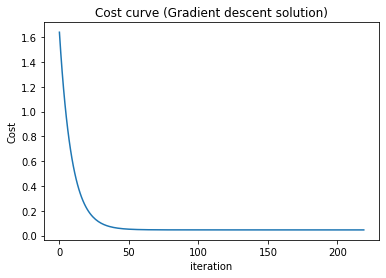

In [798]:
plotCost(costsG, "Gradient descent")